In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import config
import numpy as np
import pandas as pd
import collections
import time
import config ## TODO decide whether to use this or not, or to provide some sort of different option for these variables.
import matplotlib.pyplot as plt


data = pd.read_csv("../datasets/kddcup_data_10_percent_corrected.csv", header = None)


df_results = pd.read_csv("../results_test/20190530-141007.csv")
print(df_results.head())

  predicted    readInTime  processTime  latency  Label
0    [1.00]  170560919229         3393   115762      1
1    [1.00]  170561032801         3332     8852      1
2    [1.00]  170561033311         3176    11634      1
3    [1.00]  170561125646         3284     3295      1
4    [1.00]  170561134613         3199     3548      1


In [11]:


    #####
    ##### Metric Calculation Section
    #####

def caclulateErr(results, Print=False):
    df =pd.DataFrame()
    df["result"] = results["predicted"].str.strip("[]")
    df["truth"] = results["Label"]
    df['result'] = df['result'].astype(np.float64)
    df['truth'] = df['truth'].astype(np.float64)
    res =df.loc[~(df['result'] == df['truth'])]
    output ="error rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)
    return output


def caclulateLatency(results, vRate=None, Print=False):
    df =pd.DataFrame()    
    df['latency'] = results['latency'].astype(np.float64)
    #if isinstance(le_list,(,)):
    #df['vRate'] = vRate
    res =df.loc[~(df['latency'] >= config.LATENCYBOUND)]
    output ="exceed rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)

    vFig =plt.figure()
    vAx = vFig.add_subplot(1,1,1)
    vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
    vAx.plot(vRate)

    return output



In [19]:
# vRate=np.linspace(1,100,100)
# vRate=np.append(vRate,np.linspace(100,1,100))
# print(vRate)
# #print(len(vYRate)* config.READERINTERVAL)
# print(config.READERINTERVAL)

# vYRate = np.arange(0,len(vRate)* config.READERINTERVAL,config.READERINTERVAL)
# vYRate = vYRate.ravel()
# print(vYRate)

vRate=np.linspace(1,100,100)
print(vRate)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]


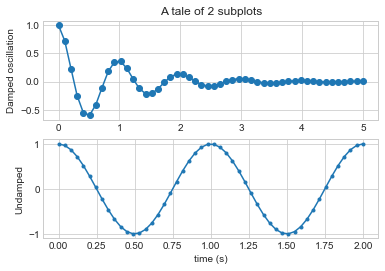

In [13]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [83]:
def expandVRate(vRate, resultsSize):
    valSum=0;
    newVRate =pd.DataFrame()
    addonRate = pd.DataFrame()
    newVRate['vRate'] = vRate
    newVRate['vInterval'] = np.nan
    for i in range(len(vRate)):
#         print(i)
        newVRate['vInterval'][i] = valSum
#         print("val:{}".format(newVRate['vRate'][i]))
        valSum += newVRate['vRate'][i]
    lastRow = newVRate.tail(1)
    print(lastRow['vInterval'])
    if lastRow['vInterval'].value < len(resultsSize):
        lastRow = newVRate.tail(1)
        for i in range(abs(len(vRate) - len(resultsSize))):
    #   row = {"vRate":lastRow['vRate'],"vIntervnal":valSum}
            addonRate = addonRate.append( {"vRate":lastRow['vRate'],"vInterval":valSum}, ignore_index=True)
            valSum += addonRate['vRate'][i]    
    newVRate = newVRate.append(addonRate, ignore_index=True)    
    return newVRate 

# print(expandVRate(vRate, df_results))
fig2 = plt.figure()
plt.plot(expandVRate(vRate, df_results))

99    4950.0
Name: vInterval, dtype: float64


AttributeError: 'Series' object has no attribute 'value'

<Figure size 432x288 with 0 Axes>

  predicted    readInTime  processTime  latency  Label
0    [1.00]  170560919229         3393   115762      1
1    [1.00]  170561032801         3332     8852      1
2    [1.00]  170561033311         3176    11634      1
3    [1.00]  170561125646         3284     3295      1
4    [1.00]  170561134613         3199     3548      1
   vRate  vInterval
0    1.0        0.0
1    2.0        1.0
2    3.0        3.0
3    4.0        6.0
4    5.0       10.0


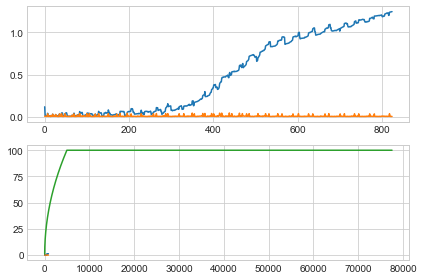

In [73]:
from datetime import datetime, timedelta
epoch = datetime(1601, 1, 1)

# def timeConvert(microSec):
#     t = epoch + timedelta(microseconds=microSec)
#     return t
# for i, row in df_results.iterrows():
#     df_results['readInTime'][i] = timeConvert(df_results['readInTime'][i])
print(df_results.head())
fig = plt.figure()
plt.subplot(2, 1, 1)
# ax = plt.axes()
plt.plot(df_results['latency'] /1000000)
plt.plot(df_results['processTime']/1000000)
# plt.plot(df_results['readInTime'],vYRate)

print(vRateNew.head())
plt.plot()
# ax.plot(vYRate)



plt.subplot(2, 1, 2)
plt.plot(df_results['latency'] /1000000)
plt.plot(df_results['processTime']/1000000)

vRateNew = expandVRate(vRate,df_results)
plt.plot(vRateNew['vInterval'],vRateNew['vRate'])

# ax2 = ax.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, vYRate, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

[ 0.          0.01000984  0.02001868  0.03002552  0.04002934  0.05002916
  0.06002396  0.07001275  0.07999452  0.08996827  0.09993302  0.10988774
  0.11983146  0.12976317  0.13968188  0.14958659  0.15947632  0.16935006
  0.17920684  0.18904566  0.19886554  0.20866549  0.21844453  0.22820168
  0.23793597  0.24764642  0.25733206  0.26699191  0.276625    0.28623038
  0.29580708  0.30535414  0.3148706   0.32435552  0.33380793  0.3432269
  0.35261147  0.36196071  0.37127369  0.38054946  0.3897871   0.39898569
  0.4081443   0.41726201  0.42633791  0.4353711   0.44436066  0.45330569
  0.46220531  0.47105861  0.47986471  0.48862273  0.49733179  0.50599102
  0.51459954  0.52315651  0.53166105  0.54011232  0.54850948  0.55685167
  0.56513807  0.57336784  0.58154016  0.58965421  0.59770917  0.60570425
  0.61363863  0.62151153  0.62932216  0.63706972  0.64475345  0.65237258
  0.65992634  0.66741398  0.67483474  0.68218788  0.68947267  0.69668838
  0.70383427  0.71090964  0.71791378  0.72484599  0.

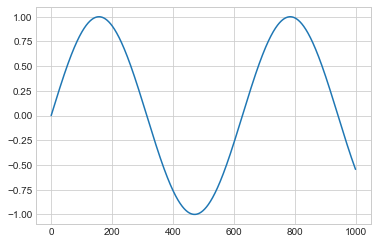

In [15]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 1000)
X = np.sin(x)
fig = plt.figure()
ax = plt.axes()
ax.plot(np.sin(x))
print(X)

(200,)
(2,)


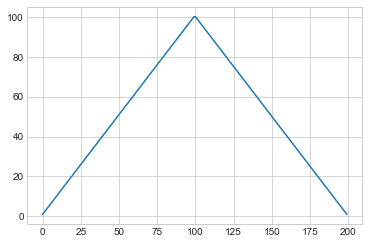

In [16]:
vFig =plt.figure()
vAx = vFig.add_subplot(1,1,1)
vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
print(vRate.shape)
print(vYRate.shape)
vAx.plot(vRate)

'exceed rate: 36.96969696969697%'

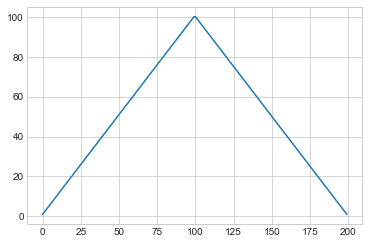

In [17]:
caclulateErr(df_results)
caclulateLatency(df_results, vRate)